In [1]:
# Basic imports
import pandas as pd
import numpy as np
import inflection

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

# Association and attribute manipulation
from dython.nominal import associations

# Encoding and scaling
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

# Oversampling
from imblearn.over_sampling import ADASYN

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report, make_scorer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Feature selection
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# Model persistence
import joblib
import pickle

# Deep learning
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Explainable AI
import shap

In [2]:
# Load train, dev, and test datasets
balanced_train_data = pd.read_csv('C:/Users/assus\PyCharmProject\Customers_Churn\data/balanced_train.csv')
dev_data = pd.read_csv('C:/Users/assus\PyCharmProject\Customers_Churn\data/dev.csv')
test_data = pd.read_csv('C:/Users/assus\PyCharmProject\Customers_Churn\data/test.csv')

# Define features and target for train dataset
y_train = balanced_train_data['churn'].values
X_train = balanced_train_data.drop(columns=['churn'])

# Define features and target for dev dataset
y_dev = dev_data['churn'].values
X_dev = dev_data.drop(columns=['churn'])

# Define features and target for test dataset
y_test = test_data['churn'].values
X_test = test_data.drop(columns=['churn'])

# Combine train and dev datasets
X_combined = pd.concat([X_train, X_dev], axis=0)
y_combined = np.concatenate([y_train, y_dev], axis=0)

# Scaling all the variables to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_combined_scaled = scaler.fit_transform(X_combined)
X_test_scaled = scaler.transform(X_test)


**1. Logistic Regression**

Logistic Regression accuracy is : 0.7683013503909026
Logistic Regression F1-score is : 0.7785585008644215
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1045
           1       0.54      0.74      0.62       362

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407


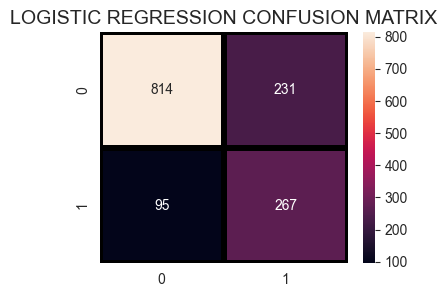

In [3]:
# Tạo DataFrame để lưu kết quả
results = []

# Sử dụng các siêu tham số đã được tinh chỉnh
logreg_best = LogisticRegression(C=0.001, max_iter=150)

# Huấn luyện mô hình với dữ liệu đã được scale
logreg_best.fit(X_combined_scaled, y_combined)

# Đánh giá mô hình
accuracy_lr = logreg_best.score(X_test_scaled, y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

# Tính toán F1-score
lr_pred = logreg_best.predict(X_test_scaled)
f1_lr = f1_score(y_test, lr_pred, average='weighted')
print("Logistic Regression F1-score is :", f1_lr)

results.append({'Model': 'Logistic Regression', 'Accuracy': accuracy_lr, 'F1 Score': f1_lr})

# Tính toán precision, recall, f1-score và support
report = classification_report(y_test, lr_pred)
print(report)

# Vẽ confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()


**2. K-Nearest Neighbors (KNN)**

In [4]:
# Khởi tạo và huấn luyện mô hình KNN với các tham số tốt nhất
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_combined_scaled, y_combined)

# Dự đoán và tính toán accuracy
accuracy_knn = knn_model.score(X_test_scaled, y_test)

# Dự đoán và tính toán classification report
predicted_y_knn = knn_model.predict(X_test_scaled)
report = classification_report(y_test, predicted_y_knn)

# In ra KNN accuracy, F1-score và classification report
print("KNN accuracy:", accuracy_knn)
print("F1-score:", f1_score(y_test, predicted_y_knn))

results.append({'Model': 'KNN', 'Accuracy': accuracy_knn, 'F1 Score': f1_score(y_test, predicted_y_knn)})

print("Classification Report:")
print(report)

KNN accuracy: 0.7604832977967306
F1-score: 0.5885225885225885
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1045
           1       0.53      0.67      0.59       362

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407


**3. Random Forest**

Random Forest accuracy: 0.7647476901208244
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1045
           1       0.53      0.77      0.63       362

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.78      1407

Random Forest f1-score: 0.6276715410573678


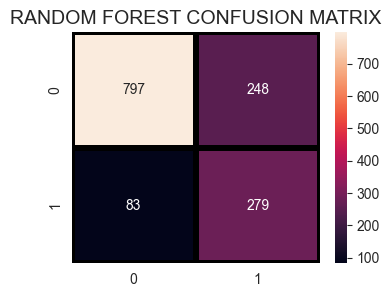

In [5]:
# Khởi tạo và huấn luyện mô hình Random Forest với các tham số tốt nhất
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, min_samples_split = 15, min_samples_leaf = 2)
rf_model.fit(X_combined_scaled, y_combined)

# Dự đoán và tính toán accuracy
accuracy_rf = rf_model.score(X_test_scaled, y_test)
print("Random Forest accuracy:", accuracy_rf)

# Dự đoán và tính toán classification report
predicted_y_rf = rf_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, predicted_y_rf))

# Tính và hiển thị f1-score
f1_score_rf = f1_score(y_test, predicted_y_rf)
print("Random Forest f1-score:", f1_score_rf)

results.append({'Model': 'Random Forest', 'Accuracy': accuracy_rf, 'F1 Score': f1_score_rf})

# Vẽ confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y_rf),
                annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()


**4. Decision Tree**

Decision Tree accuracy: 0.7668798862828714
Decision Tree f1-score: 0.7660220008874773
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1045
           1       0.55      0.54      0.54       362

    accuracy                           0.77      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.77      0.77      0.77      1407


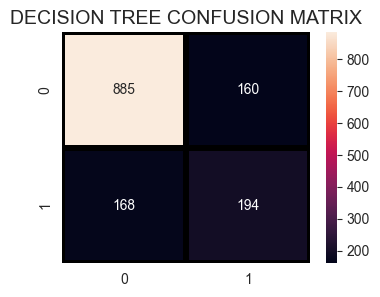

In [6]:
# Khởi tạo và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=10)
dt_model.fit(X_combined_scaled, y_combined)

# Dự đoán và tính toán accuracy
accuracy_dt = dt_model.score(X_test_scaled, y_test)
print("Decision Tree accuracy:", accuracy_dt)

# Dự đoán và tính toán f1-score
predicted_y_dt = dt_model.predict(X_test_scaled)
f1_dt = f1_score(y_test, predicted_y_dt, average='weighted')
print("Decision Tree f1-score:", f1_dt)

results.append({'Model': 'Decision Tree', 'Accuracy': accuracy_dt, 'F1 Score': f1_dt})

# Dự đoán và tính toán classification report
print("Classification Report:")
print(classification_report(y_test, predicted_y_dt))

# Vẽ confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, predicted_y_dt),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("DECISION TREE CONFUSION MATRIX", fontsize=14)
plt.show()


**5. XGBoost**

In [7]:
# Khởi tạo và huấn luyện mô hình XGBoost
xgb_model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=500)
xgb_model.fit(X_combined_scaled, y_combined)

# Dự đoán và tính toán accuracy
preds = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, preds)
print("XGBoost accuracy:", accuracy_xgb)

# Dự đoán và tính toán f1-score
f1_xgb = f1_score(y_test, preds, average='weighted')
print("XGBoost f1-score:", f1_xgb)

results.append({'Model': 'XGBoost', 'Accuracy': accuracy_xgb, 'F1 Score': f1_xgb})

# Dự đoán và tính toán classification report
print("Classification Report:")
print(classification_report(y_test, preds))


XGBoost accuracy: 0.7796730632551528
XGBoost f1-score: 0.7875065635309398
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1045
           1       0.56      0.71      0.62       362

    accuracy                           0.78      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.78      0.79      1407


**6. Neural Network (Multi-layer Perceptron)**

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Sử dụng các thông số tinh chỉnh để khởi tạo mô hình Neural Network
nn_model = Sequential()

# Thêm lớp Input với kích thước đầu vào
nn_model.add(Input(shape=(X_combined_scaled.shape[1],)))

# Thêm lớp Dense đầu tiên với số units và activation function tương ứng
nn_model.add(Dense(units=128, activation='relu'))
nn_model.add(Dropout(0.1))  # Sử dụng dropout rate là 0.3, đã được tuning

# Thêm lớp output với activation function sigmoid
nn_model.add(Dense(units=1, activation='sigmoid'))

# Compile mô hình với các thông số tinh chỉnh
optimizer = Adam(learning_rate=0.00001)  # Sử dụng learning_rate_init đã được tinh chỉnh
# Compile mô hình với 'binary_crossentropy'
nn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = nn_model.fit(X_combined_scaled, y_combined, epochs=200, batch_size=256, verbose=2, validation_data=(X_test_scaled, y_test))

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy_nn = nn_model.evaluate(X_test_scaled, y_test)
print("Accuracy on test set:", accuracy_nn)

# Dự đoán nhãn cho dữ liệu kiểm tra
predicted_y_prob = nn_model.predict(X_test_scaled)
predicted_y_nn = (predicted_y_prob > 0.5).astype('int32')

f1_nn = f1_score(y_test, predicted_y_nn, average='weighted')
print("Neural Network F1-score:", f1_nn)

results.append({'Model': 'Neural Network', 'Accuracy': accuracy_nn, 'F1 Score': f1_nn})

print("Classification Report for Neural Network:")
print(classification_report(y_test, predicted_y_nn))


Epoch 1/200
30/30 - 1s - 40ms/step - accuracy: 0.5477 - loss: 0.6803 - val_accuracy: 0.7285 - val_loss: 0.6262
Epoch 2/200
30/30 - 0s - 5ms/step - accuracy: 0.5482 - loss: 0.6779 - val_accuracy: 0.7328 - val_loss: 0.6229
Epoch 3/200
30/30 - 0s - 5ms/step - accuracy: 0.5660 - loss: 0.6730 - val_accuracy: 0.7399 - val_loss: 0.6196
Epoch 4/200
30/30 - 0s - 4ms/step - accuracy: 0.5662 - loss: 0.6702 - val_accuracy: 0.7385 - val_loss: 0.6162
Epoch 5/200
30/30 - 0s - 4ms/step - accuracy: 0.5746 - loss: 0.6665 - val_accuracy: 0.7413 - val_loss: 0.6132
Epoch 6/200
30/30 - 0s - 6ms/step - accuracy: 0.5770 - loss: 0.6627 - val_accuracy: 0.7491 - val_loss: 0.6100
Epoch 7/200
30/30 - 0s - 4ms/step - accuracy: 0.5871 - loss: 0.6591 - val_accuracy: 0.7555 - val_loss: 0.6069
Epoch 8/200
30/30 - 0s - 4ms/step - accuracy: 0.5954 - loss: 0.6557 - val_accuracy: 0.7562 - val_loss: 0.6040
Epoch 9/200
30/30 - 0s - 4ms/step - accuracy: 0.6038 - loss: 0.6518 - val_accuracy: 0.7576 - val_loss: 0.6009
Epoch 10/

**7. Convolutional Neural Network (CNN)**

In [9]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Reshape input data to include the time dimension
X_combined_scaled_reshaped = X_combined_scaled.reshape(X_combined_scaled.shape[0], X_combined_scaled.shape[1], 1)
X_test_scaled_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Khởi tạo và huấn luyện mô hình CNN với các tham số tốt nhất
cnn_model = Sequential()

# Thêm lớp Input để chỉ định kích thước đầu vào
cnn_model.add(Input(shape=(X_combined_scaled.shape[1], 1)))

# Thêm lớp Convolutional
cnn_model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))

# Thêm lớp MaxPooling
cnn_model.add(MaxPooling1D(pool_size=2))

# Thêm lớp Flatten
cnn_model.add(Flatten())

# Thêm lớp fully connected (Dense) với hidden_layer_size đã được tuning
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dropout(0.3))  # Sử dụng dropout rate là 0.3, đã được tuning

# Lớp output
cnn_model.add(Dense(units=1, activation='sigmoid'))  # Sử dụng activation 'sigmoid' vì num_classes = 2

# Compile mô hình với learning rate đã được tuning
optimizer = Adam(learning_rate=1e-05)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Sử dụng binary_crossentropy vì num_classes = 2

# Huấn luyện mô hình với số epochs đã được tuning
history = cnn_model.fit(X_combined_scaled_reshaped, y_combined, epochs=200, batch_size=256, validation_data=(X_test_scaled_reshaped, y_test))

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy_cnn = cnn_model.evaluate(X_test_scaled_reshaped, y_test)
print("Accuracy on test set:", accuracy_cnn)

# Dự đoán nhãn cho dữ liệu kiểm tra
predicted_y_cnn = (cnn_model.predict(X_test_scaled_reshaped) > 0.5).astype("int32")

# Tính và hiển thị F1-score
f1_cnn = f1_score(y_test, predicted_y_cnn)
print("F1-score for CNN:", f1_cnn)

results.append({'Model': 'Convolutional Neural Network (CNN)', 'Accuracy': accuracy_cnn, 'F1 Score': f1_cnn})

# Tính và hiển thị classification report
print("Classification Report for CNN:")
print(classification_report(y_test, predicted_y_cnn))


Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5314 - loss: 0.6873 - val_accuracy: 0.7427 - val_loss: 0.6455
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5516 - loss: 0.6790 - val_accuracy: 0.7427 - val_loss: 0.6370
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5549 - loss: 0.6756 - val_accuracy: 0.7427 - val_loss: 0.6309
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5489 - loss: 0.6749 - val_accuracy: 0.7427 - val_loss: 0.6257
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5765 - loss: 0.6661 - val_accuracy: 0.7427 - val_loss: 0.6206
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5659 - loss: 0.6668 - val_accuracy: 0.7427 - val_loss: 0.6166
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5764 - loss: 0.6618 - val_accuracy: 0.7427 - val_loss: 0.6131
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5902 - loss: 0.6563 - val_accuracy: 0.7427 - 

In [15]:
# Tạo DataFrame để lưu kết quả
results_df = pd.DataFrame(results)

# Tìm mô hình có F1 Score cao nhất
best_f1_score_model = results_df.loc[results_df['F1 Score'].idxmax()]
print("\nBest model based on F1 Score:")
print(best_f1_score_model)



Best model based on F1 Score:
Model        XGBoost
Accuracy    0.779673
F1 Score    0.787507
Name: 4, dtype: object


In [14]:
results_df

,Model,Accuracy,F1 Score
0,Logistic Regression,0.768301,0.778559
1,KNN,0.760483,0.588523
2,Random Forest,0.764748,0.627672
3,Decision Tree,0.766880,0.766022
4,XGBoost,0.779673,0.787507
5,Neural Network,0.774698,0.783240
6,Convolutional Neural Network (CNN),0.805970,0.626539


In [16]:
import pickle

# Khởi tạo danh sách để lưu kết quả
model_results = []

# Lưu Logistic Regression model
pickle_out = open("logistic_regression_model.pkl", "wb")
pickle.dump(logreg_best, pickle_out)
pickle_out.close()

# Lưu KNN model
pickle_out = open("knn_model.pkl", "wb")
pickle.dump(knn_model, pickle_out)
pickle_out.close()

# Lưu Random Forest model
pickle_out = open("random_forest_model.pkl", "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

# Lưu Decision Tree model
pickle_out = open("decision_tree_model.pkl", "wb")
pickle.dump(dt_model, pickle_out)
pickle_out.close()

# Lưu XGBoost model
pickle_out = open("xgboost_model.pkl", "wb")
pickle.dump(xgb_model, pickle_out)
pickle_out.close()


# Lưu Neural Network model
nn_model.save("neural_network_model.keras")

# Lưu Convolutional Neural Network (CNN) model
cnn_model.save("cnn_model.keras")


# Lưu kết quả của các mô hình
pickle_out = open("model_results.pkl", "wb")
pickle.dump(model_results, pickle_out)
pickle_out.close()
